<a href="https://colab.research.google.com/github/aolivas92/tensorflow_certificate_course/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 2: Deep Learning and TensorFlow Fundamentals
## In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow (or TPUs)
* Exercises to try for yourself!

Google Colab Commands:
* Change to MarkDown: CTR + M M
* Change to Code: CTR + M Y
* Add a Cell Below: CTR + M B
* Add a Cell Above: CTR + M A
* View DocString of function: CTR + SHIFT + SPACE

# Introduction to Tensors

## 16. Creating your first tensors with TensorFlow and tf.constant()

In [70]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


We are going to create a tensor but we usually won't create tensors our selves. We can use built in modules which are able to read in our data sources and automatically convert them to tensors.

To get more information about a method click CTR + SHIFT + SPACE

In [71]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [72]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [73]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [74]:
# Check the dimension of our vector
vector.ndim

1

In [75]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [76]:
# Check the dimension of our matrix
matrix.ndim

2

In [77]:
# Create a matrix with a specific datatype
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the data type with the dtype parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [78]:
# What's the number of dimensions of another_matrix?
another_matrix.ndim

2

In [79]:
# Let's create a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [80]:
tensor.ndim

3

What we've created so far:

* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of number
* Tensor: an n-dimensional array of numbers (where n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

## 17. Creating tensors with TensorFlow and `tf.Variable()`

In [81]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [82]:
# Let's try change on of the elements in our changeable tensor
# changeable_tensor[0] = 7
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>

In [83]:
# How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [84]:
# Let's try change our unchangable tensor
# unchangeable_tensor[0].assign(7)

**🔑Note**: Rarely in practice will you need to decide whether to use tf.constant or tf.Variable to create tensors, as TensorFlow does this for you. However, if in doubt, use tf.constant and change it later if needed

## 18. Creating random tensors with TensorFlow

Random tensors are tensors of some abitrary size which conatian random numbers.

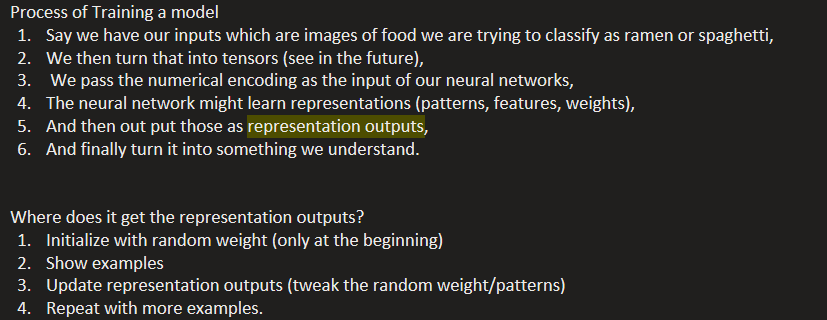

In our example below they are Pseudo random. They appear to be random but aren't because we set the seed. Setting the seed is done so someone can reproduce your expirement from a different notebook.

In [85]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(7) # set see for reproducibility
random_1 = random_1.normal(shape=(3, 2))
random_2 = tf.random.Generator.from_seed(7)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-1.3240396 ,  0.28785667],
        [-0.8757901 , -0.08857018],
        [ 0.69211644,  0.84215707]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-1.3240396 ,  0.28785667],
        [-0.8757901 , -0.08857018],
        [ 0.69211644,  0.84215707]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

## 19. Shuffling the order of tensors

The order of our data could affect how our model learns. So, it's a good idea to mix up all the data so the neural network can adjust it's patterns correctly

In [86]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Shuffle our non-shuffled tensor, it shuffles it by it's 1st dimension
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

In [87]:
# Shuffle our non-shuffled tensor
tf.random.set_seed(42) # global level seed
tf.random.shuffle(not_shuffled, seed=42) # operation level seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [88]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [89]:
nshuffled = tf.constant([[1, 2],
                         [3, 4],
                         [5, 6]])
nshuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [90]:
tf.random.set_seed(42)
tf.random.shuffle(nshuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [1, 2]], dtype=int32)>

In [91]:
# tf.random.set_seed(42)
tf.random.shuffle(nshuffled, seed=(42))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [92]:
tf.random.set_seed(42)
tf.random.shuffle(nshuffled, seed=(42))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [93]:
tf.random.set_seed(40)
tf.random.shuffle(nshuffled, seed=(40))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[5, 6],
       [1, 2],
       [3, 4]], dtype=int32)>

In [94]:
nshuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [98]:
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

🔨 **Exercise:** Read through TensorFlow documentation on random seed generation: https://www.tensorflow.org/api_docs/python/tf/random/set_seed and practice writing 5 random tensors and shuffle them.

It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed:

>Rule 4: "If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

## 20. Creating tensors from NumPy arrays

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing).

In [99]:
# Create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [100]:
# Create a tensor of all zeros
tf.zeros(shape=(3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [102]:
# You can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
numpy_A

# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(some_vector) # lower case for vectors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [106]:
A = tf.constant(numpy_A, shape=(2, 3, 4))
B = tf.constant(numpy_A)
C = tf.constant(numpy_A, shape=(3, 8))
A, B, C

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>,
 <tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>)

## 21. Getting information from your tensors (tensor attributes)